In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.exceptions import NotFittedError

In [53]:
# Step 1: Load the Iris dataset using pandas
df = pd.read_csv('/content/iris_data.csv')

In [54]:
# Step 2: Clean the data (strip any whitespace from column names)
df.columns = df.columns.str.strip()

In [55]:
# Step 3: Ensure correct column names and data types
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)


Column Names: ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']

Data Types:
 SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Species         object
dtype: object


In [56]:
# Step 4: Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64


In [57]:
# Step 5: Map species names to numerical values using factorize (automatic)
df['Species'], species_map = pd.factorize(df['Species'])
print("\nSpecies Mapping:", dict(enumerate(species_map)))


Species Mapping: {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}


In [58]:
# Step 6: Drop rows with missing values (if any)
if df.isnull().sum().sum() > 0:
    df.dropna(inplace=True)

In [59]:
# Step 7: Split the data into features (X) and target (y)
X = df.drop('Species', axis=1)
y = df['Species']

In [60]:
# Step 8: Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [62]:
# Step 9: Hyperparameter tuning for best 'k' value
param_grid = {'n_neighbors': range(1, 11)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

best_k = grid.best_params_['n_neighbors']
print(f"\nBest k value: {best_k}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



Best k value: 6


KNeighborsClassifier(n_neighbors=6)

In [64]:
# Step 10: Create and train the KNN model with best 'k'
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [63]:
# Step 11: Predict on the test set
y_pred = knn.predict(X_test)

In [65]:
# Step 12: Evaluate the model (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.2f}")


Test Accuracy: 0.25


In [66]:
# Step 13: Classification Report (Test Data)
target_names = list(species_map)
print("\nTest Set Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))


Test Set Classification Report:

              precision    recall  f1-score   support

      Setosa       0.50      1.00      0.67         1
  Versicolor       0.00      0.00      0.00         2
   Virginica       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.17      0.33      0.22         4
weighted avg       0.12      0.25      0.17         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
# Step 14: Classification Report (Training Data) — Check for overfitting
y_train_pred = knn.predict(X_train)
print("\nTraining Set Classification Report:\n")
print(classification_report(y_train, y_train_pred, target_names=target_names))


Training Set Classification Report:

              precision    recall  f1-score   support

      Setosa       0.38      0.50      0.43         6
  Versicolor       0.00      0.00      0.00         4
   Virginica       0.50      0.67      0.57         6

    accuracy                           0.44        16
   macro avg       0.29      0.39      0.33        16
weighted avg       0.33      0.44      0.38        16



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


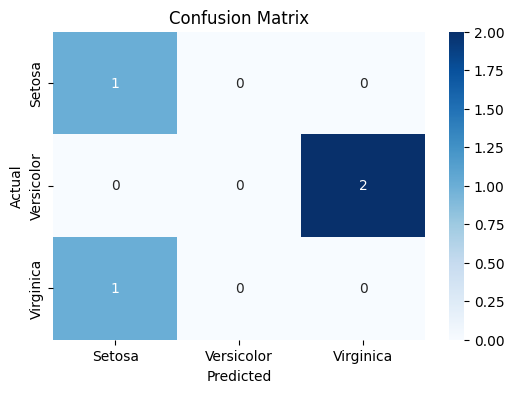

In [69]:
# Step 15: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [70]:
# Step 16: Predict a new sample
new_sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)

In [71]:
# Step 17: Ensure model is fitted before predicting
try:
    # Ensure consistent data types
    new_sample = new_sample.astype(float)

    # Predict the class for the new sample
    predicted_class = knn.predict(new_sample)[0]
    predicted_species = species_map[predicted_class]

    print(f"\nPredicted class for sample {new_sample.iloc[0].values}: {predicted_species}")

except NotFittedError as e:
    print(f"Model Error: {e}")

except ValueError as e:
    print(f"Value Error: {e}")


Predicted class for sample [5.1 3.5 1.4 0.2]: Virginica
